**Importing the dataset**

In [ ]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/dataset.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
!ls

dataset  dataset.zip  __MACOSX	sample_data


**Importing the Dependencies**

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split
import requests
from io import BytesIO
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
import itertools

##**Data Preparation and Processing for Image Classification**

**Loading and Summarizing Image Paths for Dataset**

In [ ]:
# get the training data files path
cats_dir_train = '/content/dataset/train/cats'
dogs_dir_train = '/content/dataset/train/Dogs'

cats_files_train = [os.path.join(cats_dir_train, file) for file in os.listdir(cats_dir_train) if file != '.DS_Store']
dogs_files_train = [os.path.join(dogs_dir_train, file) for file in os.listdir(dogs_dir_train) if file != '.DS_Store']

print(cats_files_train[0:5])
print(dogs_files_train[0:5])

len_cats_train = len(cats_files_train)
len_dogs_train = len(dogs_files_train)
print('Number of cat images:', len_cats_train)
print('Number of dog images:', len_dogs_train)

['/content/dataset/train/cats/cat.243.jpg', '/content/dataset/train/cats/cat.161.jpg', '/content/dataset/train/cats/cat.241.jpg', '/content/dataset/train/cats/cat.41.jpg', '/content/dataset/train/cats/cat.73.jpg']
['/content/dataset/train/Dogs/dog.305.jpg', '/content/dataset/train/Dogs/dog.411.jpg', '/content/dataset/train/Dogs/dog.341.jpg', '/content/dataset/train/Dogs/dog.384.jpg', '/content/dataset/train/Dogs/dog.80.jpg']
Number of cat images: 325
Number of dog images: 325


In [ ]:
# get the training data files path
cats_dir_test = '/content/dataset/test/cats'
dogs_dir_test = '/content/dataset/test/Dogs'

cats_files_test = [os.path.join(cats_dir_test, file) for file in os.listdir(cats_dir_test) if file != '.DS_Store']
dogs_files_test = [os.path.join(dogs_dir_test, file) for file in os.listdir(dogs_dir_test) if file != '.DS_Store']

print(cats_files_test[0:5])
print(dogs_files_test[0:5])

len_cats_test = len(cats_files_test)
len_dogs_test = len(dogs_files_test)
print('Number of cat images:', len_cats_test)
print('Number of dog images:', len_dogs_test)

['/content/dataset/test/cats/cat.430.jpg', '/content/dataset/test/cats/cat.136.jpg', '/content/dataset/test/cats/cat.500.jpg', '/content/dataset/test/cats/cat.1029.jpg', '/content/dataset/test/cats/cat.776.jpg']
['/content/dataset/test/Dogs/dog.546.jpg', '/content/dataset/test/Dogs/dog.98.jpg', '/content/dataset/test/Dogs/dog.703.jpg', '/content/dataset/test/Dogs/dog.895.jpg', '/content/dataset/test/Dogs/dog.232.jpg']
Number of cat images: 204
Number of dog images: 204


**Creating Labels for the two class of Images**

Dog -> 1

Cat -> 0

In [ ]:
# creating the labels
dog_labels_train = [1] * len_dogs_train
cat_labels_train = [0] * len_cats_train

dog_labels_test = [1] * len_dogs_test
cat_labels_test = [0] * len_cats_test

In [ ]:
labels_train = dog_labels_train + cat_labels_train
labels_test = dog_labels_test + cat_labels_test

print(len(labels_train))
print(len(labels_test))

650
408


**Displaying the images**

In [ ]:
# Function to display images
def display_images(image_files_paths, num_images=5):
    plt.figure(figsize=(20, 10))

    for i, file in enumerate(image_files_paths[:num_images]):
        image = mpimg.imread(file)

        # Extract the filename from the full path
        filename = os.path.basename(file)

        # Display image
        plt.subplot(1, num_images, i + 1)
        plt.imshow(image)
        plt.title(filename)

    plt.show()

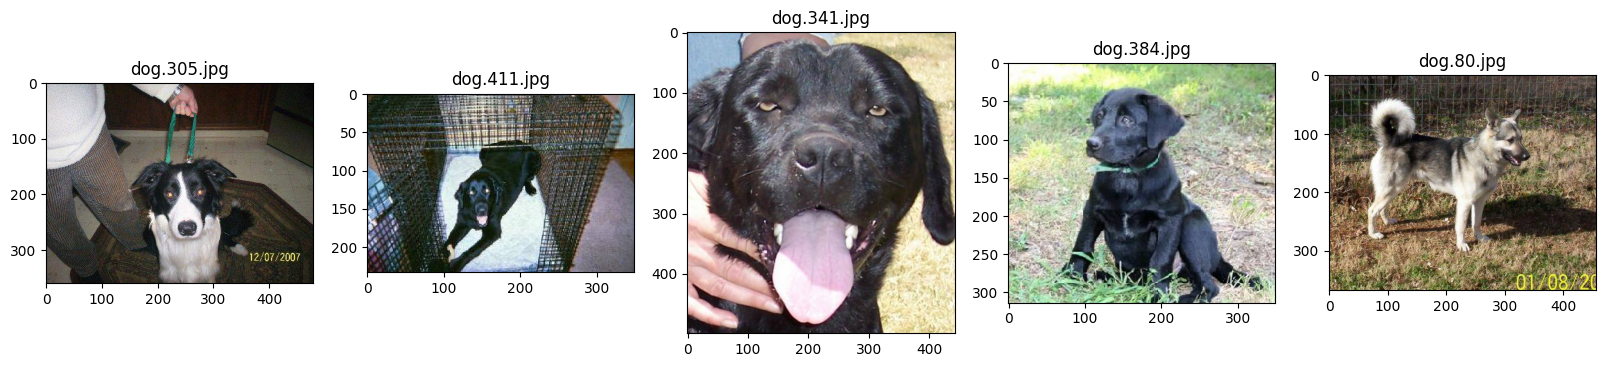

In [ ]:
# Display the first 5 dog images of train data
display_images(dogs_files_train, num_images=5)

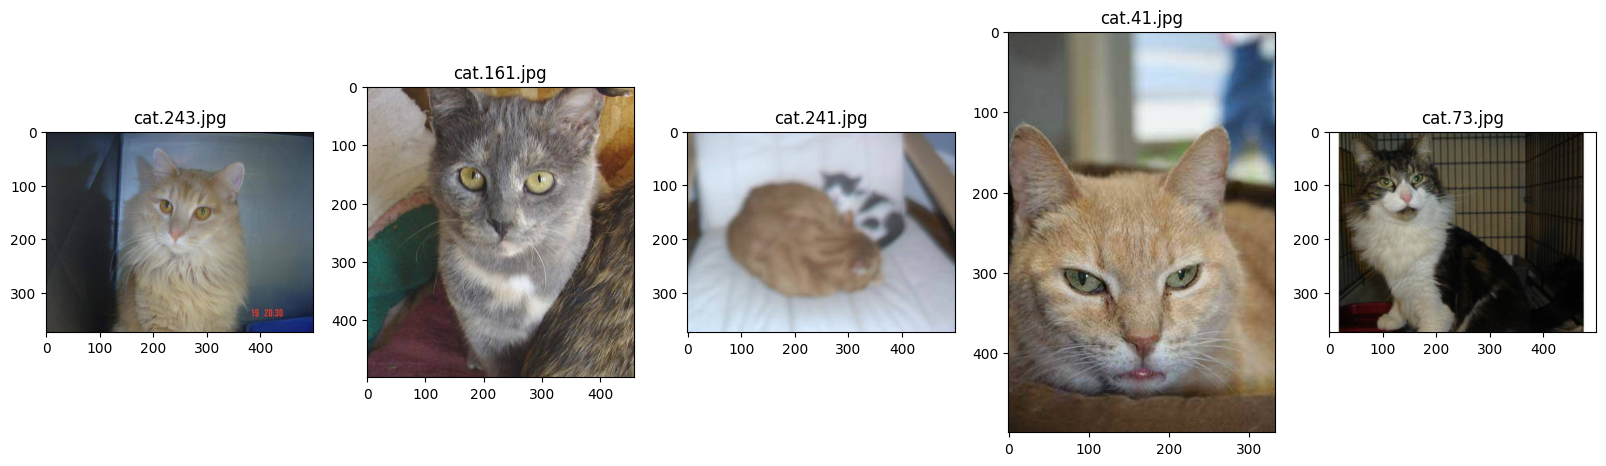

In [ ]:
# Display the first 5 cat images of train data
display_images(cats_files_train, num_images=5)

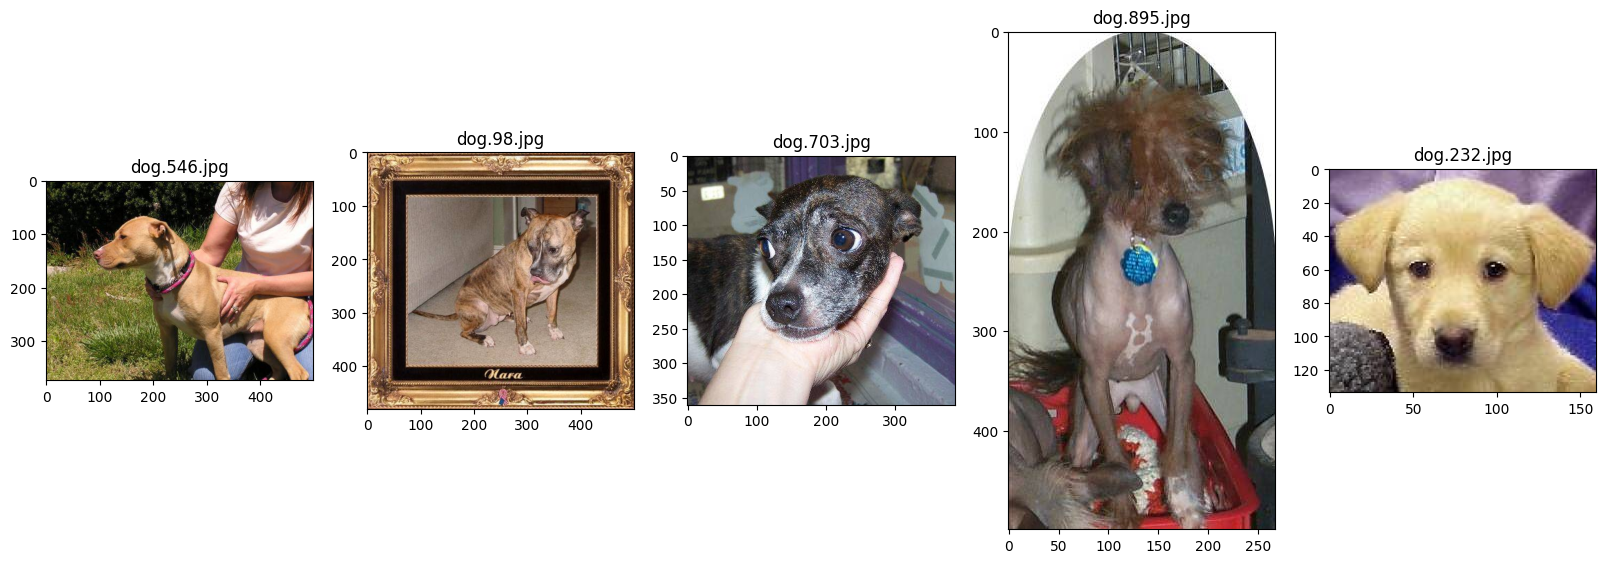

In [ ]:
# Display the first 5 dog images of test data
display_images(dogs_files_test, num_images=5)

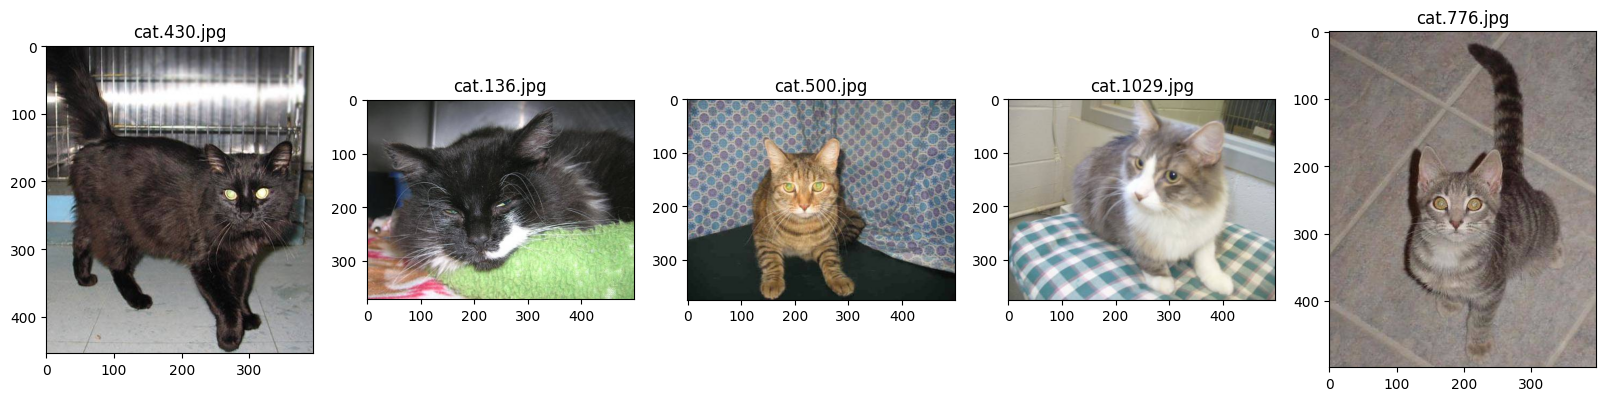

In [ ]:
# Display the first 5 cat images of test data
display_images(cats_files_test, num_images=5)

**Image Processing**

*   Resize the images into (256,256)
*   Convert the image to numpy arrays



In [ ]:
def img_process(files_paths):
    # Initialize an empty list to store processed images
    data = []

    # Loop through each image file in the directory
    for img_file_path in files_paths:
        # Open the image file
        image = Image.open(img_file_path)

        # Resize the image to (128, 128) pixels
        image = image.resize((256, 256))
        # image file -> RGB format
        # in case it's not already in RGB
        image = image.convert('RGB')
        # image file -> numpy array
        image = np.array(image)

        # Append the numpy array to the data list
        data.append(image)

    # Return the list of processed images
    return data

In [ ]:
# processed image data for train data set
dog_data_train = img_process(dogs_files_train)
cat_data_train = img_process(cats_files_train)
data_train = dog_data_train + cat_data_train

# processed image data for test data set
dog_data_test = img_process(dogs_files_test)
cat_data_test = img_process(cats_files_test)
data_test = dog_data_test + cat_data_test

array([[[189, 184, 191],
        [177, 172, 179],
        [180, 177, 184],
        ...,
        [  9,   7,   8],
        [ 10,   8,   9],
        [  9,   7,   8]],

       [[190, 185, 192],
        [185, 180, 187],
        [184, 180, 187],
        ...,
        [ 10,   8,   9],
        [  9,   7,   8],
        [  9,   7,   8]],

       [[186, 181, 188],
        [190, 185, 192],
        [193, 189, 196],
        ...,
        [ 10,   8,   9],
        [  8,   6,   7],
        [ 10,   8,   9]],

       ...,

       [[ 82,  67,  58],
        [ 76,  69,  59],
        [ 81,  81,  73],
        ...,
        [ 23,  26,  17],
        [ 23,  22,  17],
        [ 26,  23,  18]],

       [[ 90,  75,  66],
        [ 79,  72,  62],
        [ 81,  81,  72],
        ...,
        [ 25,  27,  19],
        [ 24,  23,  18],
        [ 26,  23,  18]],

       [[ 97,  82,  73],
        [ 88,  81,  71],
        [ 83,  83,  74],
        ...,
        [ 24,  27,  18],
        [ 26,  24,  19],
        [ 28,  25,  20]]], dtype=uint8)
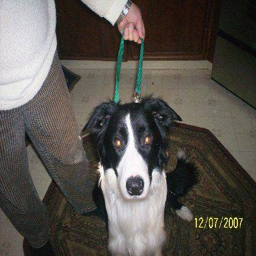

In [ ]:
data_train[0]

**Preparing Data Arrays for Training and Testing**

In [ ]:
X_train = np.array(data_train)
X_test = np.array(data_test)

Y_train = np.array(labels_train)
Y_test = np.array(labels_test)

In [ ]:
print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)

(650, 256, 256, 3) (408, 256, 256, 3)
(650,) (408,)


array([[[189, 169, 145],
        [191, 169, 145],
        [196, 170, 146],
        ...,
        [121, 111,  97],
        [125, 112, 103],
        [136, 123, 114]],

       [[190, 170, 146],
        [192, 170, 146],
        [197, 171, 146],
        ...,
        [126, 116, 104],
        [126, 113, 105],
        [140, 127, 119]],

       [[191, 171, 147],
        [193, 171, 147],
        [198, 172, 147],
        ...,
        [102,  92,  82],
        [122, 109, 103],
        [170, 157, 153]],

       ...,

       [[ 53,  50,  35],
        [ 67,  62,  59],
        [ 51,  44,  51],
        ...,
        [162, 147, 140],
        [175, 160, 153],
        [171, 156, 149]],

       [[ 60,  56,  42],
        [ 66,  61,  57],
        [ 58,  51,  58],
        ...,
        [150, 133, 126],
        [154, 139, 132],
        [152, 138, 131]],

       [[ 53,  49,  35],
        [ 55,  50,  47],
        [ 62,  55,  62],
        ...,
        [142, 123, 117],
        [140, 125, 118],
        [143, 128, 121]]], dtype=uint8)
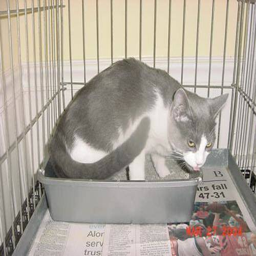

In [ ]:
X_train[600]

In [ ]:
Y_train[600]

0

**Scaling Image Data for Training and Testing**

In [ ]:
# scaling the data

X_train_scaled = X_train/255
X_test_scaled = X_test/255

array([[[189, 184, 191],
        [177, 172, 179],
        [180, 177, 184],
        ...,
        [  9,   7,   8],
        [ 10,   8,   9],
        [  9,   7,   8]],

       [[190, 185, 192],
        [185, 180, 187],
        [184, 180, 187],
        ...,
        [ 10,   8,   9],
        [  9,   7,   8],
        [  9,   7,   8]],

       [[186, 181, 188],
        [190, 185, 192],
        [193, 189, 196],
        ...,
        [ 10,   8,   9],
        [  8,   6,   7],
        [ 10,   8,   9]],

       ...,

       [[ 82,  67,  58],
        [ 76,  69,  59],
        [ 81,  81,  73],
        ...,
        [ 23,  26,  17],
        [ 23,  22,  17],
        [ 26,  23,  18]],

       [[ 90,  75,  66],
        [ 79,  72,  62],
        [ 81,  81,  72],
        ...,
        [ 25,  27,  19],
        [ 24,  23,  18],
        [ 26,  23,  18]],

       [[ 97,  82,  73],
        [ 88,  81,  71],
        [ 83,  83,  74],
        ...,
        [ 24,  27,  18],
        [ 26,  24,  19],
        [ 28,  25,  20]]], dtype=uint8)
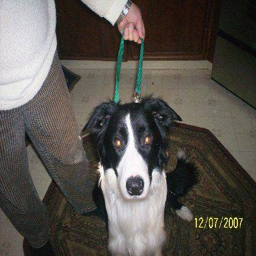

In [ ]:
X_train[0]

In [ ]:
X_train_scaled[0]

array([[[0.74117647, 0.72156863, 0.74901961],
        [0.69411765, 0.6745098 , 0.70196078],
        [0.70588235, 0.69411765, 0.72156863],
        ...,
        [0.03529412, 0.02745098, 0.03137255],
        [0.03921569, 0.03137255, 0.03529412],
        [0.03529412, 0.02745098, 0.03137255]],

       [[0.74509804, 0.7254902 , 0.75294118],
        [0.7254902 , 0.70588235, 0.73333333],
        [0.72156863, 0.70588235, 0.73333333],
        ...,
        [0.03921569, 0.03137255, 0.03529412],
        [0.03529412, 0.02745098, 0.03137255],
        [0.03529412, 0.02745098, 0.03137255]],

       [[0.72941176, 0.70980392, 0.7372549 ],
        [0.74509804, 0.7254902 , 0.75294118],
        [0.75686275, 0.74117647, 0.76862745],
        ...,
        [0.03921569, 0.03137255, 0.03529412],
        [0.03137255, 0.02352941, 0.02745098],
        [0.03921569, 0.03137255, 0.03529412]],

       ...,

       [[0.32156863, 0.2627451 , 0.22745098],
        [0.29803922, 0.27058824, 0.23137255],
        [0.31764706, 0

##**Build the CNN model**


In [ ]:
# Define the CNN model
def CNN_model(num_filters, filter_size, num_classes, input_shape, dense_units, dropout_rate, batch_normalization):
    model = keras.Sequential()

    # Add convolutional layers with max pooling
    for i in range(len(num_filters)):
      # Convolutional layer
      if i == 0:
          # first conv layer
          model.add(keras.layers.Conv2D(num_filters[i], filter_size[i], activation='relu', input_shape=input_shape, padding='valid', strides=(1, 1)))
      else:
          # other conv layers
          model.add(keras.layers.Conv2D(num_filters[i], filter_size[i], activation='relu', padding='valid', strides=(1, 1)))

      if batch_normalization[i]:
        model.add(keras.layers.BatchNormalization())
      # Max pool layer
      model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

    # Flatten layer
    model.add(keras.layers.Flatten())

    # Dense layers
    model.add(keras.layers.Dense(dense_units, activation='relu'))
    model.add(keras.layers.Dropout(dropout_rate))


    # output layer
    model.add(keras.layers.Dense(num_classes, activation='sigmoid'))

    return model

##**Hyperparameter Tuning**

###*Grid search to find the best hyperparameters - first approach*

In [ ]:
# default values
num_classes = 2
input_shape = (256, 256, 3)

# Define hyperparameter space
hyperparameters_space = {
    'num_filters':
     [
        [32,64,128,256,512],       #Doubles the number of filters
        [64,64,64,64,64],       #Keeps the number of filters
        [512,256,128,64,32]       #Halves the number of filters
      ],
    'filter_size':
    [
        [(7,7),(7,7),(5,5),(3,3),(2,2)],
        [(2,2),(3,3),(5,5),(7,7),(7,7)],
        [(3,3),(3,3),(3,3),(3,3),(3,3)],
     ],
    'dropout_rate': [0, 0.2, 0.3],
    'batch_normalization': [[True]*5, [False]*5],
    'dense_units': [128, 256, 512],
    'batch_size': [32, 64, 128]
}

best_accuracy = 0
best_hyperparameters = None

# Perform grid search
for params in itertools.product(*hyperparameters_space.values()):
    # Unpack hyperparameters
    num_filters, filter_size, dropout_rate, batch_normalization, dense_units, batch_size = params
    print(params)

    # Create CNN model with current hyperparameters
    cnn_model = CNN_model(num_filters, filter_size, num_classes, input_shape, dense_units, dropout_rate, batch_normalization)

    # Compile the model
    cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Early stopping callback
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    # Train the model
    history = cnn_model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=50, batch_size=batch_size,
                        callbacks=[early_stopping])

    # Get validation accuracy
    val_accuracy = history.history['val_accuracy'][-1]

    # Check if current hyperparameters result in better accuracy
    if val_accuracy > best_accuracy:
        best_accuracy = val_accuracy
        best_hyperparameters = params

print("Best Hyperparameters:", best_hyperparameters)
print("Best Validation Accuracy:", best_accuracy)


([32, 64, 128, 256, 512], [(7, 7), (7, 7), (5, 5), (3, 3), (2, 2)], 0, [True, True, True, True, True], 128, 32)
Epoch 1/50
19/19 [==============================] - 6s 142ms/step - loss: 1.4236 - accuracy: 0.5726 - val_loss: 3.8246 - val_accuracy: 0.0462
Epoch 2/50
19/19 [==============================] - 2s 125ms/step - loss: 0.6779 - accuracy: 0.6650 - val_loss: 1.7201 - val_accuracy: 0.0154
Epoch 3/50
19/19 [==============================] - 2s 127ms/step - loss: 0.6179 - accuracy: 0.7077 - val_loss: 1.0010 - val_accuracy: 0.3077
Epoch 4/50
19/19 [==============================] - 2s 129ms/step - loss: 0.5136 - accuracy: 0.7556 - val_loss: 0.6416 - val_accuracy: 0.6000
Epoch 5/50
19/19 [==============================] - 2s 121ms/step - loss: 0.4239 - accuracy: 0.8000 - val_loss: 0.4400 - val_accuracy: 0.7231
Epoch 6/50
19/19 [==============================] - 2s 123ms/step - loss: 0.3270 - accuracy: 0.8462 - val_loss: 0.5137 - val_accuracy: 0.7231
Epoch 7/50
19/19 [==================

###*Refining Hyperparameters Based on Initial Results*

When the the hyperparameter tuning the available RAM was crashed. so I decide to reduce the hyperparameters based on the results in this part.

*  For the 0.2 rate the valdidation accuracy was reduced. so change the dropout rate into 0. *No dropout*

*  change the batch size into 64

*  change the dense units into 512

In [ ]:
# default values
num_classes = 2
input_shape = (256, 256, 3)

# Define hyperparameter space
hyperparameters_space = {
    'num_filters':
     [
        [32,64,128,256,512],       #Doubles the number of filters
        [64,64,64,64,64],       #Keeps the number of filters
        [512,256,128,64,32]       #Halves the number of filters
      ],
    'filter_size':
    [
        [(7,7),(7,7),(5,5),(3,3),(2,2)],
        [(2,2),(3,3),(5,5),(7,7),(7,7)],
        [(3,3),(3,3),(3,3),(3,3),(3,3)],
     ],
    'dropout_rate': [0],
    'batch_normalization': [[True]*5, [False]*5],
    'dense_units': [512],
    'batch_size': [64]
}

best_accuracy = 0
best_hyperparameters = None

# Perform grid search
for params in itertools.product(*hyperparameters_space.values()):
    # Unpack hyperparameters
    num_filters, filter_size, dropout_rate, batch_normalization, dense_units, batch_size = params
    print(params)

    # Create CNN model with current hyperparameters
    cnn_model = CNN_model(num_filters, filter_size, num_classes, input_shape, dense_units, dropout_rate, batch_normalization)

    # Compile the model
    cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Early stopping callback
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    # Train the model
    history = cnn_model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=50, batch_size=batch_size,
                        callbacks=[early_stopping])

    # Get validation accuracy
    val_accuracy = history.history['val_accuracy'][-1]

    # Check if current hyperparameters result in better accuracy
    if val_accuracy > best_accuracy:
        best_accuracy = val_accuracy
        best_hyperparameters = params

print("Best Hyperparameters:", best_hyperparameters)
print("Best Validation Accuracy:", best_accuracy)


([32, 64, 128, 256, 512], [(7, 7), (7, 7), (5, 5), (3, 3), (2, 2)], 0, [True, True, True, True, True], 512, 64)
Epoch 1/50
10/10 [==============================] - 20s 556ms/step - loss: 9.6544 - accuracy: 0.5265 - val_loss: 0.0185 - val_accuracy: 1.0000
Epoch 2/50
10/10 [==============================] - 2s 213ms/step - loss: 0.8135 - accuracy: 0.5778 - val_loss: 2.3408 - val_accuracy: 0.0000e+00
Epoch 3/50
10/10 [==============================] - 2s 207ms/step - loss: 0.6517 - accuracy: 0.6547 - val_loss: 1.1337 - val_accuracy: 0.0615
Epoch 4/50
10/10 [==============================] - 2s 209ms/step - loss: 0.5653 - accuracy: 0.7060 - val_loss: 2.0160 - val_accuracy: 0.0308
Epoch 5/50
10/10 [==============================] - 2s 223ms/step - loss: 0.5017 - accuracy: 0.7658 - val_loss: 1.6228 - val_accuracy: 0.1385
Epoch 6/50
10/10 [==============================] - 2s 221ms/step - loss: 0.4018 - accuracy: 0.8308 - val_loss: 1.1716 - val_accuracy: 0.3231
([32, 64, 128, 256, 512], [(7, 

ResourceExhaustedError: Graph execution error:

Detected at node sequential_12/conv2d_60/Relu defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py", line 37, in <module>

  File "/usr/local/lib/python3.10/dist-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelapp.py", line 619, in start

  File "/usr/local/lib/python3.10/dist-packages/tornado/platform/asyncio.py", line 195, in start

  File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever

  File "/usr/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once

  File "/usr/lib/python3.10/asyncio/events.py", line 80, in _run

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 685, in <lambda>

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 738, in _run_callback

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 825, in inner

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 786, in run

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 361, in process_one

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 261, in dispatch_shell

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 539, in execute_request

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py", line 302, in do_execute

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/zmqshell.py", line 539, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2975, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3030, in _run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3257, in run_cell_async

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code

  File "<ipython-input-18-d625afe3ac06>", line 44, in <cell line: 29>

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1807, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1150, in train_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 590, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/base_layer.py", line 1149, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 96, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/sequential.py", line 398, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/functional.py", line 515, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/functional.py", line 672, in _run_internal_graph

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/base_layer.py", line 1149, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 96, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py", line 321, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/activations.py", line 306, in relu

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend.py", line 5395, in relu

OOM when allocating tensor with shape[64,512,250,250] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[{{node sequential_12/conv2d_60/Relu}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.
 [Op:__inference_train_function_48827]

###*modified hyperparameter space*

In [ ]:
# Define hyperparameter space
hyperparameters_space = {
    'num_filters': [
        [32, 64, 128, 256, 512],  # Doubles the number of filters
        [64, 64, 64, 64, 64],     # Keeps the number of filters
        [512, 256, 128, 64, 32]   # Halves the number of filters
    ],
    'filter_size': [
        [(7, 7), (7, 7), (5, 5), (3, 3), (2, 2)],
        [(2, 2), (3, 3), (5, 5), (7, 7), (7, 7)],
        [(3, 3), (3, 3), (3, 3), (3, 3), (3, 3)]
    ],
    'batch_normalization': [[True]*5, [False]*5],
}

best_accuracy = 0
best_hyperparameters = None

# Perform grid search
for params in itertools.product(*hyperparameters_space.values()):
    # Unpack hyperparameters
    num_filters, filter_size, batch_normalization = params
    print(params)

    # Create CNN model with current hyperparameters
    cnn_model = CNN_model(num_filters, filter_size, num_classes, input_shape, dense_units=512, dropout_rate=0, batch_normalization=batch_normalization)

    # Compile the model
    cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Early stopping callback
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    # Train the model
    history = cnn_model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=50, batch_size=64, callbacks=[early_stopping])

    # Get validation accuracy
    val_accuracy = history.history['val_accuracy'][-1]

    # Check if current hyperparameters result in better accuracy
    if val_accuracy > best_accuracy:
        best_accuracy = val_accuracy
        best_hyperparameters = params

print("Best Hyperparameters:", best_hyperparameters)
print("Best Validation Accuracy:", best_accuracy)


([32, 64, 128, 256, 512], [(7, 7), (7, 7), (5, 5), (3, 3), (2, 2)], [True, True, True, True, True])
Epoch 1/50
10/10 [==============================] - 6s 274ms/step - loss: 9.8905 - accuracy: 0.4838 - val_loss: 0.2493 - val_accuracy: 0.9231
Epoch 2/50
10/10 [==============================] - 2s 237ms/step - loss: 0.8761 - accuracy: 0.5778 - val_loss: 0.4801 - val_accuracy: 0.8154
Epoch 3/50
10/10 [==============================] - 2s 233ms/step - loss: 0.6354 - accuracy: 0.6581 - val_loss: 2.0276 - val_accuracy: 0.0923
Epoch 4/50
10/10 [==============================] - 2s 228ms/step - loss: 0.5502 - accuracy: 0.7350 - val_loss: 0.5816 - val_accuracy: 0.5846
Epoch 5/50
10/10 [==============================] - 2s 224ms/step - loss: 0.4131 - accuracy: 0.8205 - val_loss: 1.1580 - val_accuracy: 0.2154
Epoch 6/50
10/10 [==============================] - 2s 227ms/step - loss: 0.3360 - accuracy: 0.8581 - val_loss: 0.9415 - val_accuracy: 0.3846
([32, 64, 128, 256, 512], [(7, 7), (7, 7), (5, 5

ResourceExhaustedError: Graph execution error:

Detected at node sequential_25/conv2d_125/Relu defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py", line 37, in <module>

  File "/usr/local/lib/python3.10/dist-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelapp.py", line 619, in start

  File "/usr/local/lib/python3.10/dist-packages/tornado/platform/asyncio.py", line 195, in start

  File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever

  File "/usr/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once

  File "/usr/lib/python3.10/asyncio/events.py", line 80, in _run

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 685, in <lambda>

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 738, in _run_callback

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 825, in inner

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 786, in run

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 361, in process_one

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 261, in dispatch_shell

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 539, in execute_request

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py", line 302, in do_execute

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/zmqshell.py", line 539, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2975, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3030, in _run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3257, in run_cell_async

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code

  File "<ipython-input-19-38b779e6878b>", line 35, in <cell line: 20>

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1807, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1150, in train_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 590, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/base_layer.py", line 1149, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 96, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/sequential.py", line 398, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/functional.py", line 515, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/functional.py", line 672, in _run_internal_graph

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/base_layer.py", line 1149, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 96, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py", line 321, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/activations.py", line 306, in relu

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend.py", line 5395, in relu

OOM when allocating tensor with shape[64,512,250,250] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[{{node sequential_25/conv2d_125/Relu}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.
 [Op:__inference_train_function_92805]

###*Divide the hyperparameters into two sets and Find the best one*

In [ ]:
num_classes = 2
input_shape = (256,256,3)
# Define hyperparameter space
hyperparameters_space = {
    'num_filters': [
        [32, 64, 128, 256, 512],  # Doubles the number of filters
    ],
    'filter_size': [
        [(7, 7), (7, 7), (5, 5), (3, 3), (2, 2)],
        [(2, 2), (3, 3), (5, 5), (7, 7), (7, 7)],
        [(3, 3), (3, 3), (3, 3), (3, 3), (3, 3)]
    ],
    'batch_normalization': [[True]*5, [False]*5],
}

best_accuracy = 0
best_hyperparameters = None

# Perform grid search
for params in itertools.product(*hyperparameters_space.values()):
    # Unpack hyperparameters
    num_filters, filter_size, batch_normalization = params
    print(params)

    # Create CNN model with current hyperparameters
    cnn_model = CNN_model(num_filters, filter_size, num_classes, input_shape, dense_units=512, dropout_rate=0, batch_normalization=batch_normalization)

    # Compile the model
    cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Early stopping callback
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    # Train the model
    history = cnn_model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=50, batch_size=64, callbacks=[early_stopping])

    # Get validation accuracy
    val_accuracy = history.history['val_accuracy'][-1]

    # Check if current hyperparameters result in better accuracy
    if val_accuracy > best_accuracy:
        best_accuracy = val_accuracy
        best_hyperparameters = params

print("Best Hyperparameters:", best_hyperparameters)
print("Best Validation Accuracy:", best_accuracy)


([32, 64, 128, 256, 512], [(7, 7), (7, 7), (5, 5), (3, 3), (2, 2)], [True, True, True, True, True])
Epoch 1/50
10/10 [==============================] - 22s 537ms/step - loss: 6.7020 - accuracy: 0.5641 - val_loss: 0.2784 - val_accuracy: 0.9385
Epoch 2/50
10/10 [==============================] - 2s 212ms/step - loss: 1.2051 - accuracy: 0.5983 - val_loss: 2.4222 - val_accuracy: 0.0923
Epoch 3/50
10/10 [==============================] - 2s 224ms/step - loss: 0.7506 - accuracy: 0.6906 - val_loss: 0.1193 - val_accuracy: 0.9538
Epoch 4/50
10/10 [==============================] - 2s 231ms/step - loss: 0.5519 - accuracy: 0.7709 - val_loss: 1.4459 - val_accuracy: 0.2000
Epoch 5/50
10/10 [==============================] - 2s 219ms/step - loss: 0.3641 - accuracy: 0.8615 - val_loss: 0.2368 - val_accuracy: 0.9385
Epoch 6/50
10/10 [==============================] - 2s 212ms/step - loss: 0.3104 - accuracy: 0.8735 - val_loss: 0.6482 - val_accuracy: 0.7231
Epoch 7/50
10/10 [=============================

In [ ]:
num_classes = 2
input_shape = (256,256,3)
# Define hyperparameter space
hyperparameters_space = {
    'num_filters': [
        [64, 64, 64, 64, 64]   # Keeps the number of filters
    ],
    'filter_size': [
        [(7, 7), (7, 7), (5, 5), (3, 3), (2, 2)],
        [(2, 2), (3, 3), (5, 5), (7, 7), (7, 7)],
        [(3, 3), (3, 3), (3, 3), (3, 3), (3, 3)]
    ],
    'batch_normalization': [[True]*5, [False]*5],
}

best_accuracy = 0
best_hyperparameters = None

# Perform grid search
for params in itertools.product(*hyperparameters_space.values()):
    # Unpack hyperparameters
    num_filters, filter_size, batch_normalization = params
    print(params)

    # Create CNN model with current hyperparameters
    cnn_model = CNN_model(num_filters, filter_size, num_classes, input_shape, dense_units=512, dropout_rate=0, batch_normalization=batch_normalization)

    # Compile the model
    cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Early stopping callback
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    # Train the model
    history = cnn_model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=50, batch_size=64, callbacks=[early_stopping])

    # Get validation accuracy
    val_accuracy = history.history['val_accuracy'][-1]

    # Check if current hyperparameters result in better accuracy
    if val_accuracy > best_accuracy:
        best_accuracy = val_accuracy
        best_hyperparameters = params

print("Best Hyperparameters:", best_hyperparameters)
print("Best Validation Accuracy:", best_accuracy)


([64, 64, 64, 64, 64], [(7, 7), (7, 7), (5, 5), (3, 3), (2, 2)], [True, True, True, True, True])
Epoch 1/50
10/10 [==============================] - 22s 629ms/step - loss: 1.6293 - accuracy: 0.5880 - val_loss: 1.8516 - val_accuracy: 0.0462
Epoch 2/50
10/10 [==============================] - 3s 284ms/step - loss: 0.8511 - accuracy: 0.6513 - val_loss: 1.5668 - val_accuracy: 0.1692
Epoch 3/50
10/10 [==============================] - 3s 289ms/step - loss: 0.3964 - accuracy: 0.8154 - val_loss: 0.9231 - val_accuracy: 0.4154
Epoch 4/50
10/10 [==============================] - 3s 287ms/step - loss: 0.2565 - accuracy: 0.9077 - val_loss: 0.8887 - val_accuracy: 0.4923
Epoch 5/50
10/10 [==============================] - 3s 282ms/step - loss: 0.2100 - accuracy: 0.9282 - val_loss: 1.3797 - val_accuracy: 0.3846
Epoch 6/50
10/10 [==============================] - 3s 281ms/step - loss: 0.1234 - accuracy: 0.9641 - val_loss: 0.6138 - val_accuracy: 0.6308
Epoch 7/50
10/10 [==============================] 

In [ ]:
num_classes = 2
input_shape = (256,256,3)
# Define hyperparameter space
hyperparameters_space = {
    'num_filters': [
        [256, 128, 64, 32, 16]   # Halves the number of filters
    ],
    'filter_size': [
        [(7, 7), (7, 7), (5, 5), (3, 3), (2, 2)],
        [(2, 2), (3, 3), (5, 5), (7, 7), (7, 7)],
        [(3, 3), (3, 3), (3, 3), (3, 3), (3, 3)]
    ],
    'batch_normalization': [[True]*5, [False]*5],
}

best_accuracy = 0
best_hyperparameters = None

# Perform grid search
for params in itertools.product(*hyperparameters_space.values()):
    # Unpack hyperparameters
    num_filters, filter_size, batch_normalization = params
    print(params)

    # Create CNN model with current hyperparameters
    cnn_model = CNN_model(num_filters, filter_size, num_classes, input_shape, dense_units=512, dropout_rate=0, batch_normalization=batch_normalization)

    # Compile the model
    cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Early stopping callback
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    # Train the model
    history = cnn_model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=50, batch_size=64, callbacks=[early_stopping])

    # Get validation accuracy
    val_accuracy = history.history['val_accuracy'][-1]

    # Check if current hyperparameters result in better accuracy
    if val_accuracy > best_accuracy:
        best_accuracy = val_accuracy
        best_hyperparameters = params

print("Best Hyperparameters:", best_hyperparameters)
print("Best Validation Accuracy:", best_accuracy)


([256, 128, 64, 32, 16], [(7, 7), (7, 7), (5, 5), (3, 3), (2, 2)], [True, True, True, True, True])
Epoch 1/50


ResourceExhaustedError: Graph execution error:

Detected at node sequential_14/batch_normalization_40/FusedBatchNormV3 defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py", line 37, in <module>

  File "/usr/local/lib/python3.10/dist-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelapp.py", line 619, in start

  File "/usr/local/lib/python3.10/dist-packages/tornado/platform/asyncio.py", line 195, in start

  File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever

  File "/usr/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once

  File "/usr/lib/python3.10/asyncio/events.py", line 80, in _run

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 685, in <lambda>

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 738, in _run_callback

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 825, in inner

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 786, in run

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 361, in process_one

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 261, in dispatch_shell

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 539, in execute_request

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py", line 302, in do_execute

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/zmqshell.py", line 539, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2975, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3030, in _run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3257, in run_cell_async

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code

  File "<ipython-input-29-1f0fcbcee6cf>", line 35, in <cell line: 20>

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1807, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1150, in train_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 590, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/base_layer.py", line 1149, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 96, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/sequential.py", line 398, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/functional.py", line 515, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/functional.py", line 672, in _run_internal_graph

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/base_layer.py", line 1149, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 96, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/layers/normalization/batch_normalization.py", line 597, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/layers/normalization/batch_normalization.py", line 990, in _fused_batch_norm

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/control_flow_util.py", line 108, in smart_cond

  File "/usr/local/lib/python3.10/dist-packages/keras/src/layers/normalization/batch_normalization.py", line 964, in _fused_batch_norm_training

OOM when allocating tensor with shape[64,256,250,250] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[{{node sequential_14/batch_normalization_40/FusedBatchNormV3}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.
 [Op:__inference_train_function_53615]

##**Train the Model with Best Hyperparameters**

Here, I can't tuning the model for the [512, 256, 128, 64, 32] these number of filters. beacause of during run time it throgh a out of memory error.

Then, I can't combine to observe the hyperparameter tuning was not avaible of large model. so based on the pervious result I find the following parameters as the most suitable for the model.

* num_classes = 2
* input_shape = (256, 256, 3)
* num_filters = [32,64,128,256,512]     #Doubles the number of filters
* filter_size = [(2,2),(3,3),(5,5),(7,7),(7,7)]
* dropout_rate = 0
* batch_normalization = [False, False, False, False, False]
* dense_units = 512
* batch_size = 64


In [ ]:
best_hyperparameters = ( [32, 64, 128, 256, 512], [(2, 2), (3, 3), (5, 5), (7, 7), (7, 7)], [False, False, False, False, False])

In [ ]:
dropout_rate = 0
input_shape = (256,256,3)
num_classes = 2
dense_units = 512
batch_size = 64
# Assign the best_hyperparameters
num_filters, filter_size, batch_normalization = best_hyperparameters

# Create CNN model with best hyperparameters
cnn_model = CNN_model(num_filters, filter_size, num_classes, input_shape, dense_units, dropout_rate, batch_normalization)

# Compile the model
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = cnn_model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=50, batch_size=batch_size, callbacks=[early_stopping])

# Print the model summary
cnn_model.summary()

# Get the final validation accuracy and loss
final_val_accuracy = history.history['val_accuracy'][-1]
final_val_loss = history.history['val_loss'][-1]

print("Best Hyperparameters:", best_hyperparameters)
print("Best Validation Accuracy:", best_accuracy)
print("Final Validation Accuracy:", final_val_accuracy)
print("Final Validation Loss:", final_val_loss)

Epoch 1/50
10/10 [==============================] - 4s 239ms/step - loss: 1.5968 - accuracy: 0.5128 - val_loss: 0.8922 - val_accuracy: 0.0000e+00
Epoch 2/50
10/10 [==============================] - 2s 175ms/step - loss: 0.6845 - accuracy: 0.5556 - val_loss: 0.8025 - val_accuracy: 0.0000e+00
Epoch 3/50
10/10 [==============================] - 2s 168ms/step - loss: 0.6884 - accuracy: 0.5556 - val_loss: 0.8262 - val_accuracy: 0.0000e+00
Epoch 4/50
10/10 [==============================] - 2s 170ms/step - loss: 0.6827 - accuracy: 0.5556 - val_loss: 0.8266 - val_accuracy: 0.0000e+00
Epoch 5/50
10/10 [==============================] - 2s 170ms/step - loss: 0.6789 - accuracy: 0.5556 - val_loss: 1.0336 - val_accuracy: 0.0000e+00
Epoch 6/50
10/10 [==============================] - 2s 171ms/step - loss: 0.6793 - accuracy: 0.5556 - val_loss: 1.1247 - val_accuracy: 0.0000e+00
Epoch 7/50
10/10 [==============================] - 2s 173ms/step - loss: 0.6639 - accuracy: 0.5573 - val_loss: 0.7589 - val

*Plot Training History*

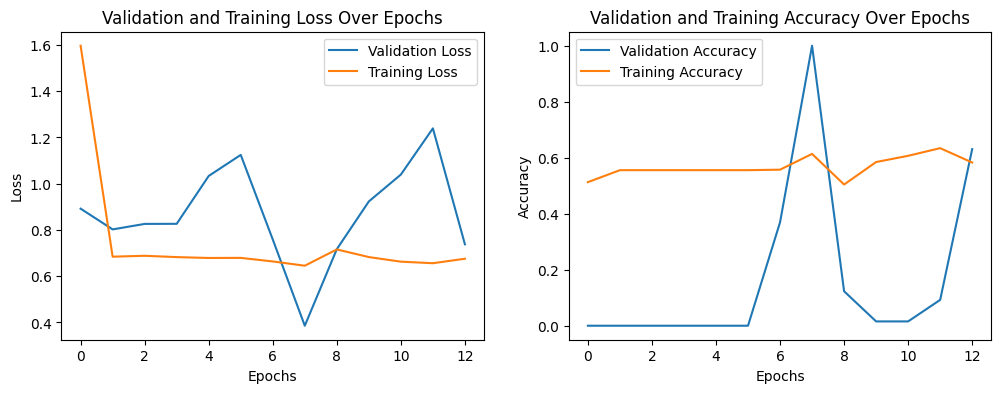

In [ ]:
# Plot the training history
def plot_training_history(history):
    plt.figure(figsize=(12, 4))

    # Plot validation and training loss
    plt.subplot(1, 2, 1)
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.plot(history.history['loss'], label='Training Loss')
    plt.title('Validation and Training Loss Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Plot validation accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.title('Validation and Training Accuracy Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()

# Call the plot function
plot_training_history(history)


##**Training with Different Optimizers**

*Training with Various Optimizers*

In [ ]:
optimizers = {
    'SGD': tf.keras.optimizers.SGD(),
    'SGD with Momentum': tf.keras.optimizers.SGD(momentum=0.9),
    'RMSProp': tf.keras.optimizers.RMSprop(),
    'Adagrad': tf.keras.optimizers.Adagrad(),
    'Adam': tf.keras.optimizers.Adam()
}

histories = {}
for opt_name, opt in optimizers.items():
    print(f"Training with {opt_name}")
    # compile the model
    cnn_model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    # Early stopping callback
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    # Train the model
    history = cnn_model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=50, batch_size=batch_size, callbacks=[early_stopping])
    histories[opt_name] = history


Training with SGD
Epoch 1/50
10/10 [==============================] - 6s 311ms/step - loss: 0.3944 - accuracy: 0.8427 - val_loss: 0.0531 - val_accuracy: 1.0000
Epoch 2/50
10/10 [==============================] - 2s 229ms/step - loss: 0.3310 - accuracy: 0.8667 - val_loss: 0.8042 - val_accuracy: 0.4154
Epoch 3/50
10/10 [==============================] - 2s 238ms/step - loss: 0.3325 - accuracy: 0.8667 - val_loss: 0.0677 - val_accuracy: 1.0000
Epoch 4/50
10/10 [==============================] - 2s 242ms/step - loss: 0.3312 - accuracy: 0.8650 - val_loss: 0.3668 - val_accuracy: 0.9385
Epoch 5/50
10/10 [==============================] - 2s 246ms/step - loss: 0.2925 - accuracy: 0.8838 - val_loss: 0.0919 - val_accuracy: 1.0000
Epoch 6/50
10/10 [==============================] - 3s 259ms/step - loss: 0.3160 - accuracy: 0.8684 - val_loss: 0.0479 - val_accuracy: 1.0000
Epoch 7/50
10/10 [==============================] - 2s 244ms/step - loss: 0.2696 - accuracy: 0.9009 - val_loss: 0.3950 - val_accur

*Plot accuracy and loss for each optimizer*

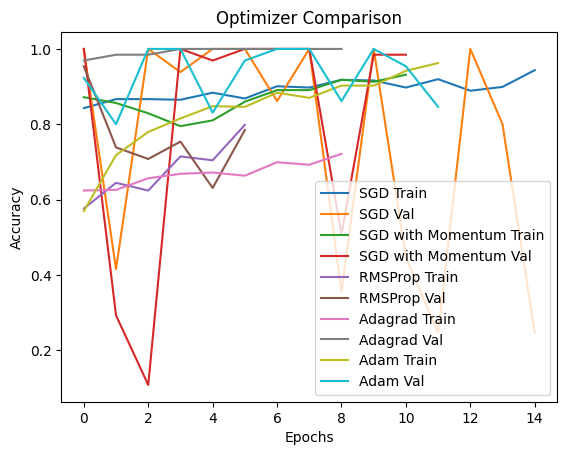

In [ ]:
for opt_name, history in histories.items():
    plt.plot(history.history['accuracy'], label=f'{opt_name} Train')
    plt.plot(history.history['val_accuracy'], label=f'{opt_name} Val')

plt.title('Optimizer Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

##**Apply the Best Model to Test Data**

*Evaluate the Model on Test Set*

In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = cnn_model.evaluate(X_test_scaled, Y_test)
print("Test Accuracy:", test_accuracy)
print("Test Loss:", test_loss)

13/13 [==============================] - 1s 36ms/step - loss: 0.7455 - accuracy: 0.5098
Test Accuracy: 0.5098039507865906
Test Loss: 0.7455314993858337


*Sample Predictions*

In [ ]:
!pip install opencv-python-headless numpy requests

In [ ]:
# Function to download an image from a URL
def download_image(url):
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    img_path = "random_image.jpg"
    img.save(img_path)
    return img_path

In [ ]:
def predict_dog_or_cat(image_url):
    # Download the image and get the path
    image_path = download_image(image_url)
    # image processing
    input_image = cv2.imread(image_path)
    input_image_resized = cv2.resize(input_image, (256,256))
    cv2_imshow(input_image_resized)
    input_image_scaled = input_image_resized/255
    input_image_reshaped = np.reshape(input_image_scaled, [1,256,256,3])
    input_prediction = cnn_model.predict(input_image_reshaped)
    # probability of wearing a mask and not wearing a mask
    print(input_prediction)

    # find the class of the image
    input_pred_label = np.argmax(input_prediction)
    print(input_pred_label)

    # come to the conclusion
    if input_pred_label == 1:
      print('The image is dog')
    else:
      print('The image is cat')

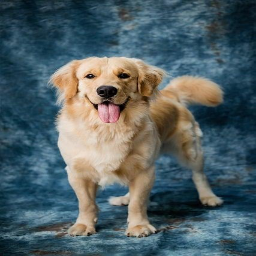

1/1 [==============================] - 0s 83ms/step
[[0.5652246  0.46436208]]
0
The image is cat


In [ ]:
predict_dog_or_cat('https://cdn.pixabay.com/photo/2023/08/18/15/02/dog-8198719_640.jpg')

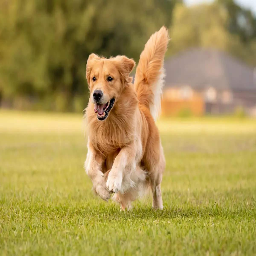

1/1 [==============================] - 0s 17ms/step
[[0.42631885 0.5466954 ]]
1
The image is dog


In [ ]:
predict_dog_or_cat('https://m.economictimes.com/thumb/msid-99053579,width-1200,height-900,resizemode-4,imgsize-58734/1.jpg')

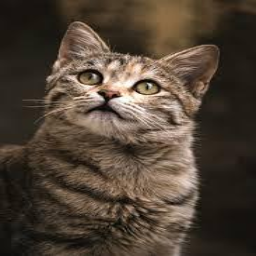

1/1 [==============================] - 0s 18ms/step
[[0.57178897 0.45814967]]
0
The image is cat


In [ ]:
predict_dog_or_cat('https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSrPPsN6ZN6d6soLP65ywS3ApcZLgzFBH6qOg&s')

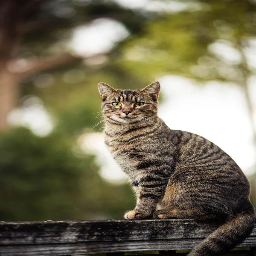

1/1 [==============================] - 0s 18ms/step
[[0.6024607  0.43226197]]
0
The image is cat


In [ ]:
predict_dog_or_cat('https://i.pinimg.com/736x/2c/8e/98/2c8e981280d108b806c2e07bfbcc15b9.jpg')